<h1> Sleep Health and Lifestyle </h1>

![Alt Text](Sleep_picture.jpg)

<h2> The Problem </h2>

Living in today's fast-paced world, sleep has become an overlooked components of our health. Poor sleep habits, rising stress levels, and sedantary routines and increasinly linked to various chronic health problems, however the roots of these sleep habits and disorders remained complex and multidimensional.

With this, organization and healthcare providers may need data-driven insights to understand different aspects that contribute to poor sleep, how it differentiates between different demographics, and what interventions are possible that might improve health outcomes.

🔍 
<i>How can we identify and address the key factors influencing poor sleep quality and sleep disorders across different demographics to support healthier living?</i>

<h3> Dataset Overview </h3>

The dataset consists of 400 indviduals and includes the following variables:

- Demographics: Person ID, Age, Gender, Occupation
- Sleep Metrics: Sleep Duration, Quality of Sleep (1-10), Sleep Disorder type
- Health Indicators: BMI Category, Blood Pressure, Heart Rate (bpm)
- Lifestyle Factors: Physical Activity (minutes/day), Stress Level (scale 1-10),

<h3> Analytical Questions </h3>

1. Which factors are most associated with low sleep quality?
2. How do sleep disorders vary by age, gender, and occupation?
3. Is there a link between physical activity, stress levels, and sleep duration?
4. Do individuals with better cardiovascular indicators (e.g. lower heart rate, normal blood pressure) sleep better?
5. What lifestyle patterns distinguish individuals without sleep disorders from those with insomnia or apnea?

<i>Source of dataset: <a>https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset</a></i>

<h4> Importing Packages and Loading the Dataset </h4>

In [80]:
#Importing packages and loading the dataset

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Load the data
sleep = pd.read_csv('sleep.csv')
sleep.set_index('Person ID', inplace=True)

<h4> Cleaning the Dataset </h4>

In [ ]:
sleep_transformed = sleep.copy()

# Transform the data
sleep_transformed['Gender'] = sleep_transformed['Gender'].astype('category')
sleep_transformed['Age'] = sleep_transformed['Age'].astype('int16')
sleep_transformed['Occupation'] = sleep_transformed['Occupation'].astype('category')
sleep_transformed['Sleep Duration (hours)'] = sleep_transformed['Sleep Duration (hours)'].astype('float32')
sleep_transformed['Physical Activity Level (minutes/day)'] = sleep_transformed['Physical Activity Level (minutes/day)'].astype('int16')
sleep_transformed['BMI Category'] = sleep_transformed['BMI Category'].astype('category')
sleep_transformed['Heart Rate (bpm)'] = sleep_transformed['Heart Rate (bpm)'].astype('int16')
sleep_transformed['Daily Steps'] = sleep_transformed['Daily Steps'].astype('int16')
sleep_transformed['Sleep Disorder'] = sleep_transformed['Sleep Disorder'].astype('category')

# Reorder the categories
sleep_transformed['BMI Category'] = sleep_transformed['BMI Category'].cat.set_categories(new_categories = ['Underweight', 'Normal', 'Overweight', 'Obese'], ordered = True)


#Checking data types
print(sleep_transformed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 400 non-null    category
 1   Age                                    400 non-null    int16   
 2   Occupation                             400 non-null    category
 3   Sleep Duration (hours)                 400 non-null    float32 
 4   Quality of Sleep (scale: 1-10)         400 non-null    float64 
 5   Physical Activity Level (minutes/day)  400 non-null    int16   
 6   Stress Level (scale: 1-10)             400 non-null    int64   
 7   BMI Category                           400 non-null    category
 8   Blood Pressure (systolic/diastolic)    400 non-null    object  
 9   Heart Rate (bpm)                       400 non-null    int16   
 10  Daily Steps                            400 non-null    int16   
 11

In [124]:
#Normality test

from scipy.stats import shapiro

stat, p = shapiro(sleep_transformed['Sleep Duration (hours)'])
print('Sleep Duration | Shapiro-Wilk test: Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = shapiro(sleep_transformed['Physical Activity Level (minutes/day)'])
print('Physical Activity Level | Shapiro-Wilk test: Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = shapiro(sleep_transformed['Stress Level (scale: 1-10)'])
print('Stress Level | Shapiro-Wilk test: Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = shapiro(sleep_transformed['Age'])
print('Age | Shapiro-Wilk test: Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = shapiro(sleep_transformed['Quality of Sleep (scale: 1-10)'])
print('Sleep Quality | Shapiro-Wilk test: Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = shapiro(sleep_transformed['Heart Rate (bpm)'])
print('Heart Rate | Shapiro-Wilk test: Statistics=%.3f, p=%.3f' % (stat, p))

Sleep Duration | Shapiro-Wilk test: Statistics=0.943, p=0.000
Physical Activity Level | Shapiro-Wilk test: Statistics=0.950, p=0.000
Stress Level | Shapiro-Wilk test: Statistics=0.936, p=0.000
Age | Shapiro-Wilk test: Statistics=0.973, p=0.000
Sleep Quality | Shapiro-Wilk test: Statistics=0.990, p=0.008
Heart Rate | Shapiro-Wilk test: Statistics=0.946, p=0.000


<h4>Exploratory Data Analysis</h4>

<h2>❔<i> What factors are most associated with low sleep quality?</i></h2>

<Axes: >

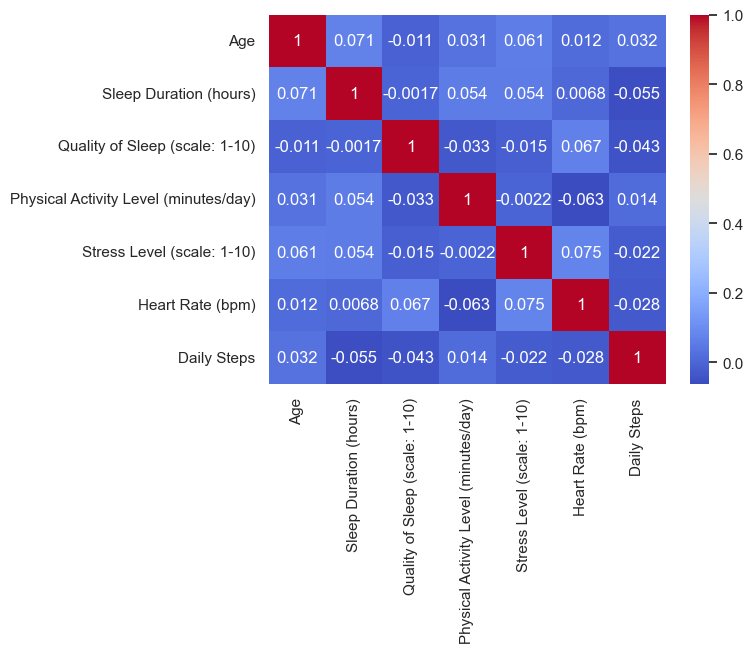

In [82]:
corr = sleep_transformed.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: >

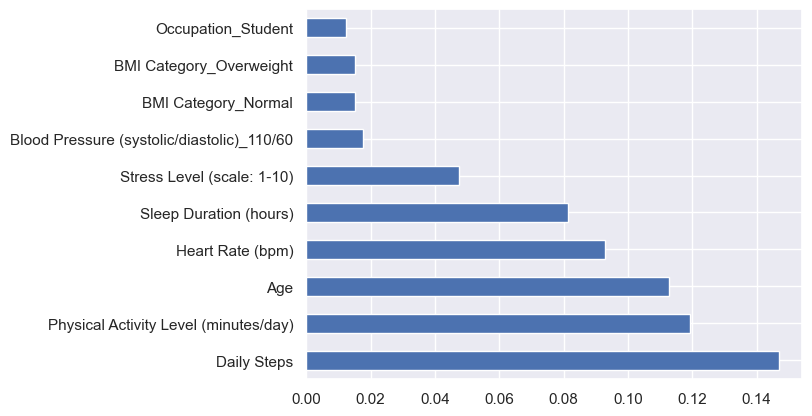

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

sleep_encoded = pd.get_dummies(sleep_transformed, drop_first=True)

# Prepare data
X = sleep_encoded.drop(columns=['Quality of Sleep (scale: 1-10)'])
y = sleep_encoded['Quality of Sleep (scale: 1-10)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')

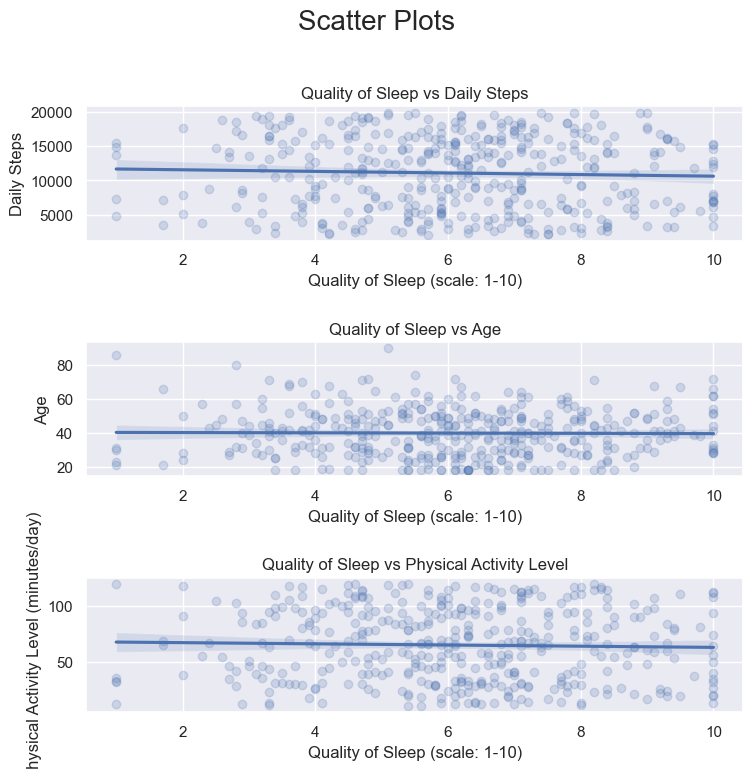

In [ ]:
fig1, axes1 = plt.subplots(3, figsize = (8,8))
sns.set_theme(font_scale = 1)

ax11 = sns.regplot(x = 'Quality of Sleep (scale: 1-10)', y = 'Daily Steps', data = sleep_transformed, ax= axes1[0], scatter_kws={'alpha' : 0.2})
ax11.set_title('Quality of Sleep vs Daily Steps')

ax12 = sns.regplot(x = 'Quality of Sleep (scale: 1-10)', y = 'Age', data = sleep_transformed, ax= axes1[1], scatter_kws={'alpha' : 0.2})
ax12.set_title('Quality of Sleep vs Age')

ax13 = sns.regplot(x = 'Quality of Sleep (scale: 1-10)', y = 'Physical Activity Level (minutes/day)', data = sleep_transformed, ax= axes1[2], scatter_kws={'alpha' : 0.2})
ax13.set_title('Quality of Sleep vs Physical Activity Level')

fig1.suptitle('Scatter Plots', fontsize = 20)
fig1.tight_layout(pad=2.0)
plt.show()

<h3>Insight</h3>

According to the Random Forest Regressor and the Regression Plot, the factors that are most associated with sleep quality are those which involves physical activity like Daily Steps and Physical Activity Level which contributes to around 25~27% of model's prediction of sleep quality. Age can also be included to the list of factors that can be associated with sleep quality. However, every factor does not provide any significant signs of relationship to sleep quality but given the context that the factors are being relatively compared to one another, the top three factors show the most association.

<h2>❔<i>How do sleep disorders vary by age, gender, occupation?</i></h2>

Text(0.5, 1.0, 'Sleep Disorder by Age')

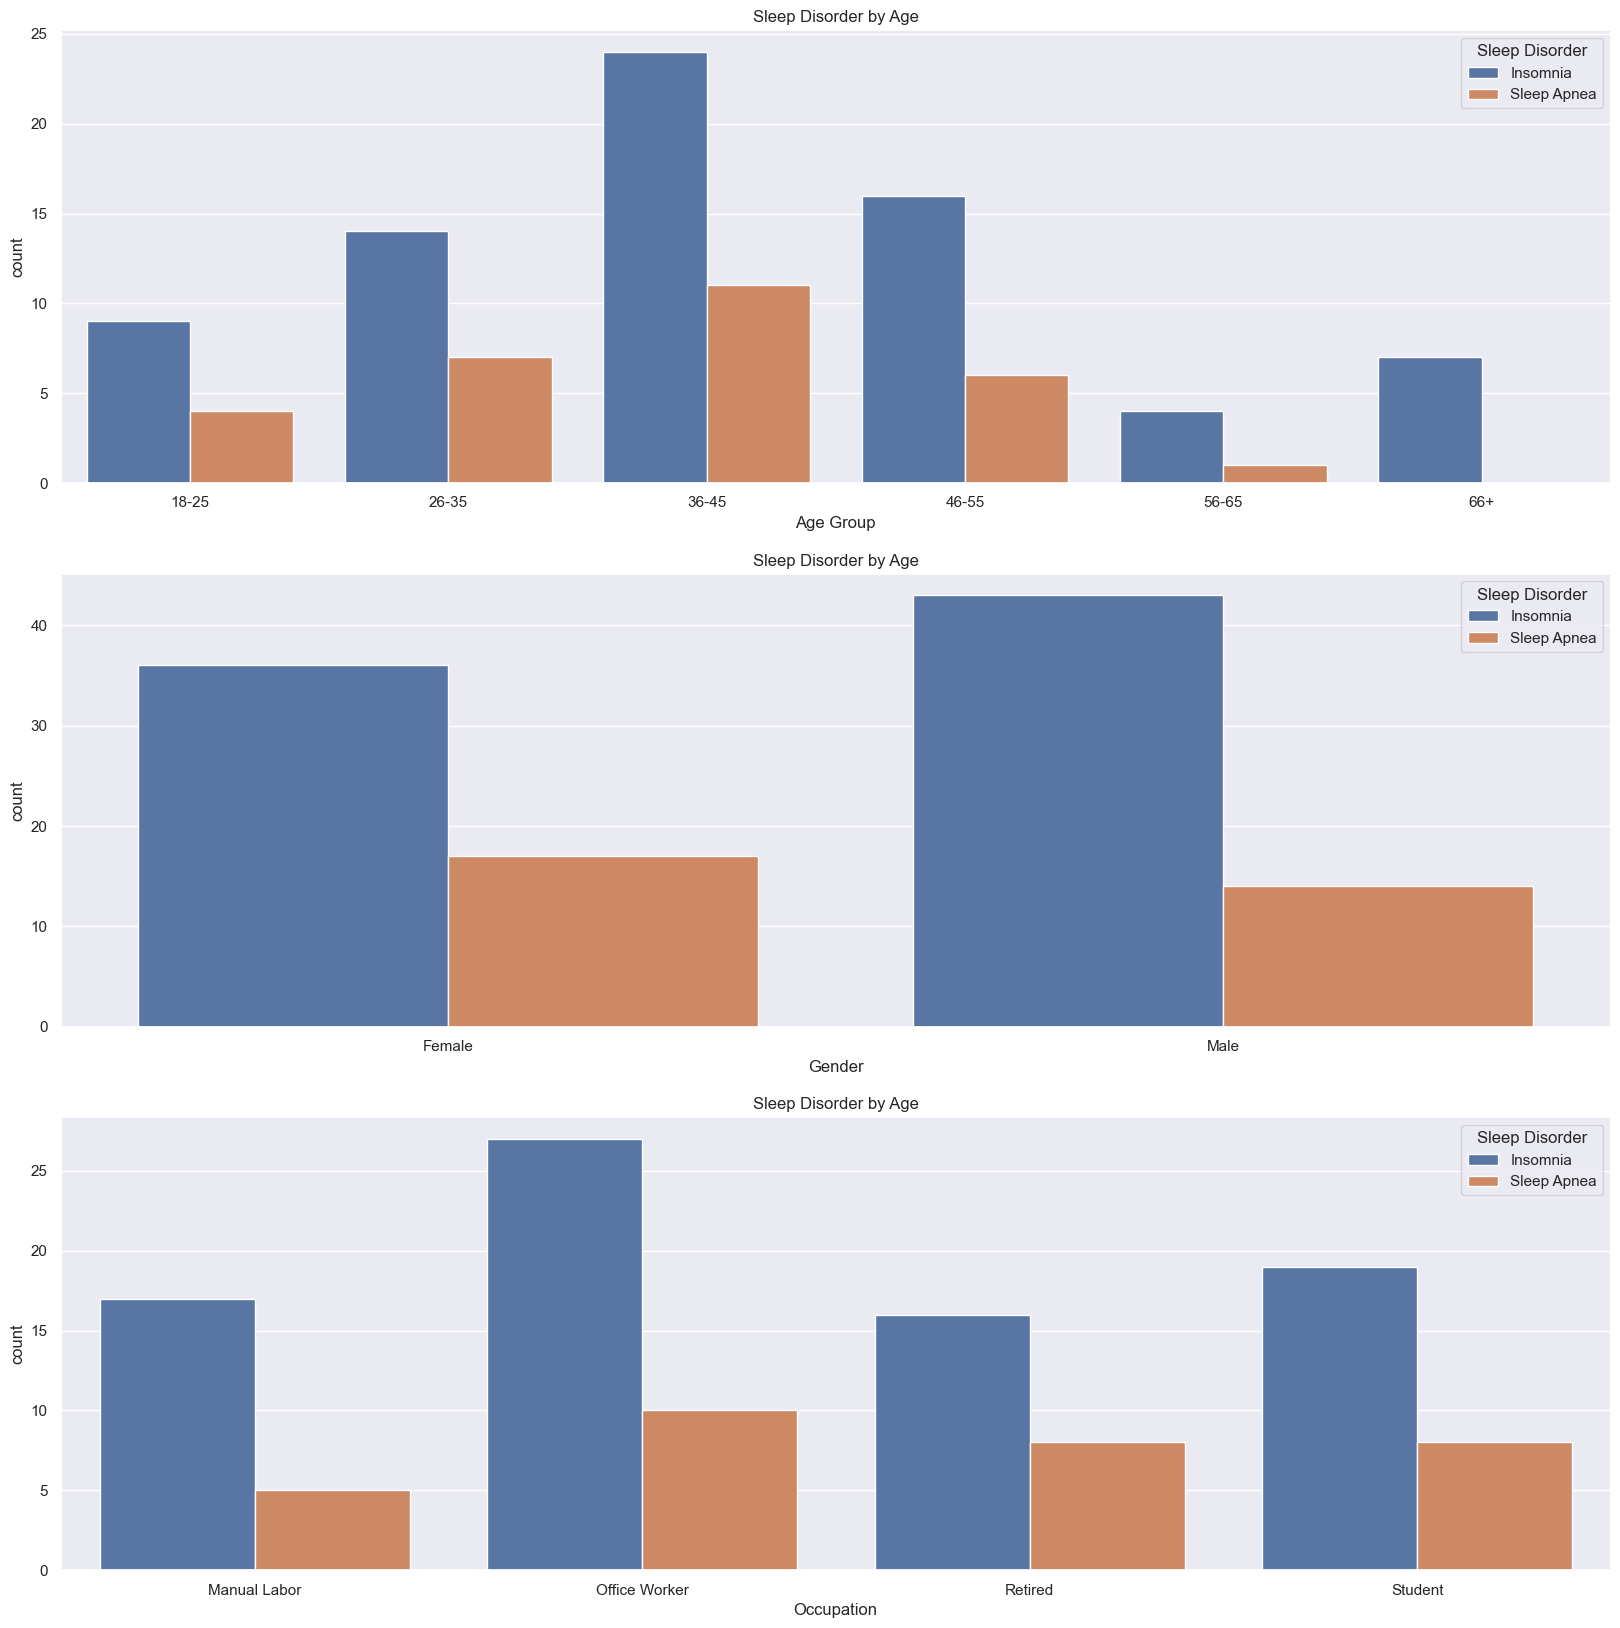

In [ ]:
fig2, axes2 = plt.subplots(3, figsize = (20,20))
sns.set_theme(font_scale = 1)

sleep_transformed['Age Group'] = pd.cut(sleep_transformed['Age'], bins=[18,25,35,45,55,65,80], labels = ['18-25', '26-35', '36-45','46-55', '56-65', '66+'])
ax21 = sns.countplot(x = 'Age Group', hue = 'Sleep Disorder', data = sleep_transformed, ax= axes2[0])
ax21.set_title('Sleep Disorder by Age')

ax22 = sns.countplot(x = 'Gender', hue = 'Sleep Disorder', data = sleep_transformed, ax= axes2[1])
ax22.set_title('Sleep Disorder by Age')

ax23 = sns.countplot(x = 'Occupation', hue = 'Sleep Disorder', data = sleep_transformed, ax= axes2[2])
ax23.set_title('Sleep Disorder by Age')

<h3>Insight</h3>

Sleep disorders varies between different demographic groups. For instance, Male participants suffer more from Insomnia than Female participants, however, Female participants suffer more from Sleep Apnea than the Males. 36-45 year old participants suffer from both sleeping disorders than the other age groups. Interestingly, participants aged more than 66 years old don't suffer from Sleep Apnea. When it comes to occupation, Office Workers suffer the most from Insomnia and Sleep Apnea. Students are next in line from suffering the most in Insomnia. Generally, Insomnia is shown to be more prevalent than Sleep Apnea in all demographic factors.

We can deduct that partipants who are engaged with their work and academics are more prone to sleeping disorders. Especially those who are male in their 30s-40s. This may be caused by the pressure that comes from their working environment.

<h3>❔<i>Is there a link between physical actvity, stress levels, and sleep duration?</i></h3>

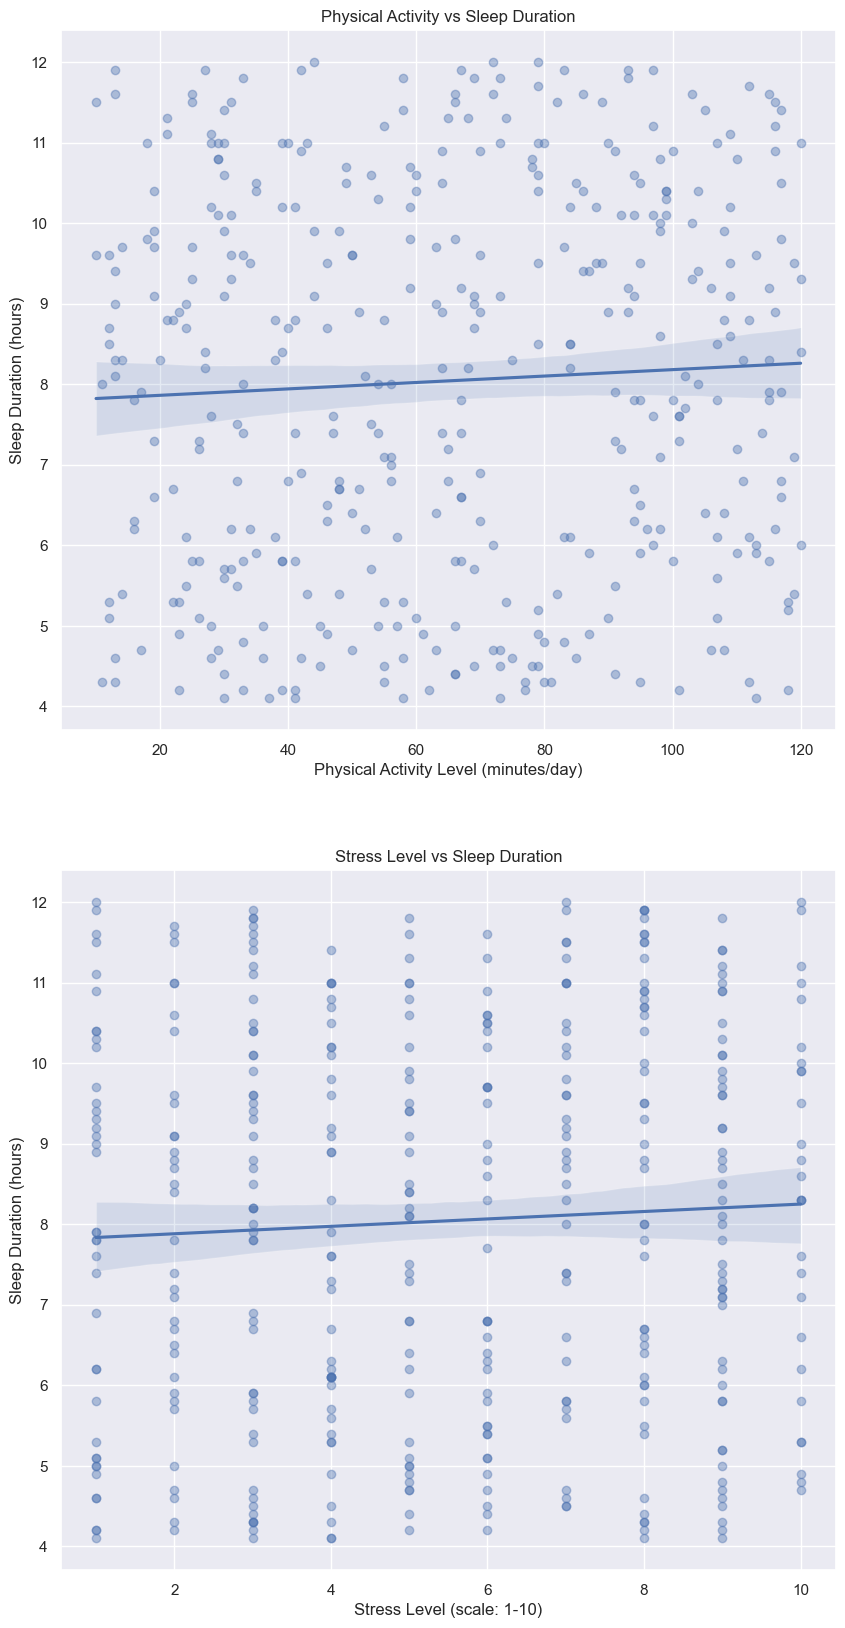

,Physical Activity Level (minutes/day),Stress Level (scale: 1-10),Sleep Duration (hours)
Physical Activity Level (minutes/day),1.000000,-0.00216,0.053806
Stress Level (scale: 1-10),-0.002160,1.00000,0.054120
Sleep Duration (hours),0.053806,0.05412,1.000000


In [114]:
fig3, axes3 = plt.subplots(2, figsize = (10,20))
sns.set_theme(font_scale=1)

ax31 = sns.regplot(data=sleep_transformed, x='Physical Activity Level (minutes/day)', y='Sleep Duration (hours)', scatter_kws={'alpha':0.4}, ax = axes3[0])
ax31.set_title("Physical Activity vs Sleep Duration")

ax32 = sns.regplot(data=sleep_transformed, x='Stress Level (scale: 1-10)', y='Sleep Duration (hours)', scatter_kws={'alpha':0.4}, ax = axes3[1])
ax32.set_title("Stress Level vs Sleep Duration")
plt.show()

sleep_transformed[['Physical Activity Level (minutes/day)', 'Stress Level (scale: 1-10)', 'Sleep Duration (hours)']].corr()

<h3> Insights</h3>
According to the regression plots and the correlation matrix, there is little to no links between Physical Activity Level, Stress Levels, and Sleep Duration. Here are the analysis between each factors:
    - The correlation value of -0.002 between Physical Activity Level and Stress Level indicates that there is no correlation between them.
    - The 0.054 correlation value of Physical Activity Level and Sleep Duration shows that there is a very small relationship between them but not conclusive enough to support the claim of relationship.
    - There isn't also enough value to show a relationship between Stress Level and Sleep Duration since the correlation value is only 0.05412
The regression plots also show an almost flat line, indicating a low relationship between all factors.

<h3>❔<i>Do individuals with better cardiovascular indicators (e.g. lower heart rate, normal blood pressure) sleep better?</i></h3>

In [87]:
sleep_transformed[['Heart Rate (bpm)', 'Sleep Duration (hours)']].corr()

,Heart Rate (bpm),Sleep Duration (hours)
Heart Rate (bpm),1.000000,0.006808
Sleep Duration (hours),0.006808,1.000000


In [88]:
sleep_transformed[['Systolic', 'Diastolic']] = sleep_transformed['Blood Pressure (systolic/diastolic)'].str.split('/', expand=True).astype(int)

def categorize_bp(row):
    sys = row['Systolic']
    dia = row['Diastolic']
    
    if sys >= 180 or dia >= 120:
        return 'Hypertensive Crisis'
    elif sys >= 140 or dia >= 90:
        return 'High Stage 2'
    elif sys >= 130 or dia >= 80:
        return 'High Stage 1'
    elif sys >= 120 and dia < 80:
        return 'Elevated'
    else:
        return 'Normal'

sleep_transformed['BP Category'] = sleep_transformed.apply(categorize_bp, axis=1).astype('category')
sleep_transformed['BP Category'] = sleep_transformed['BP Category'].cat.set_categories(new_categories = ['Normal', 'Elevated', 'High Stage 1', 'High Stage 2'], ordered = True)

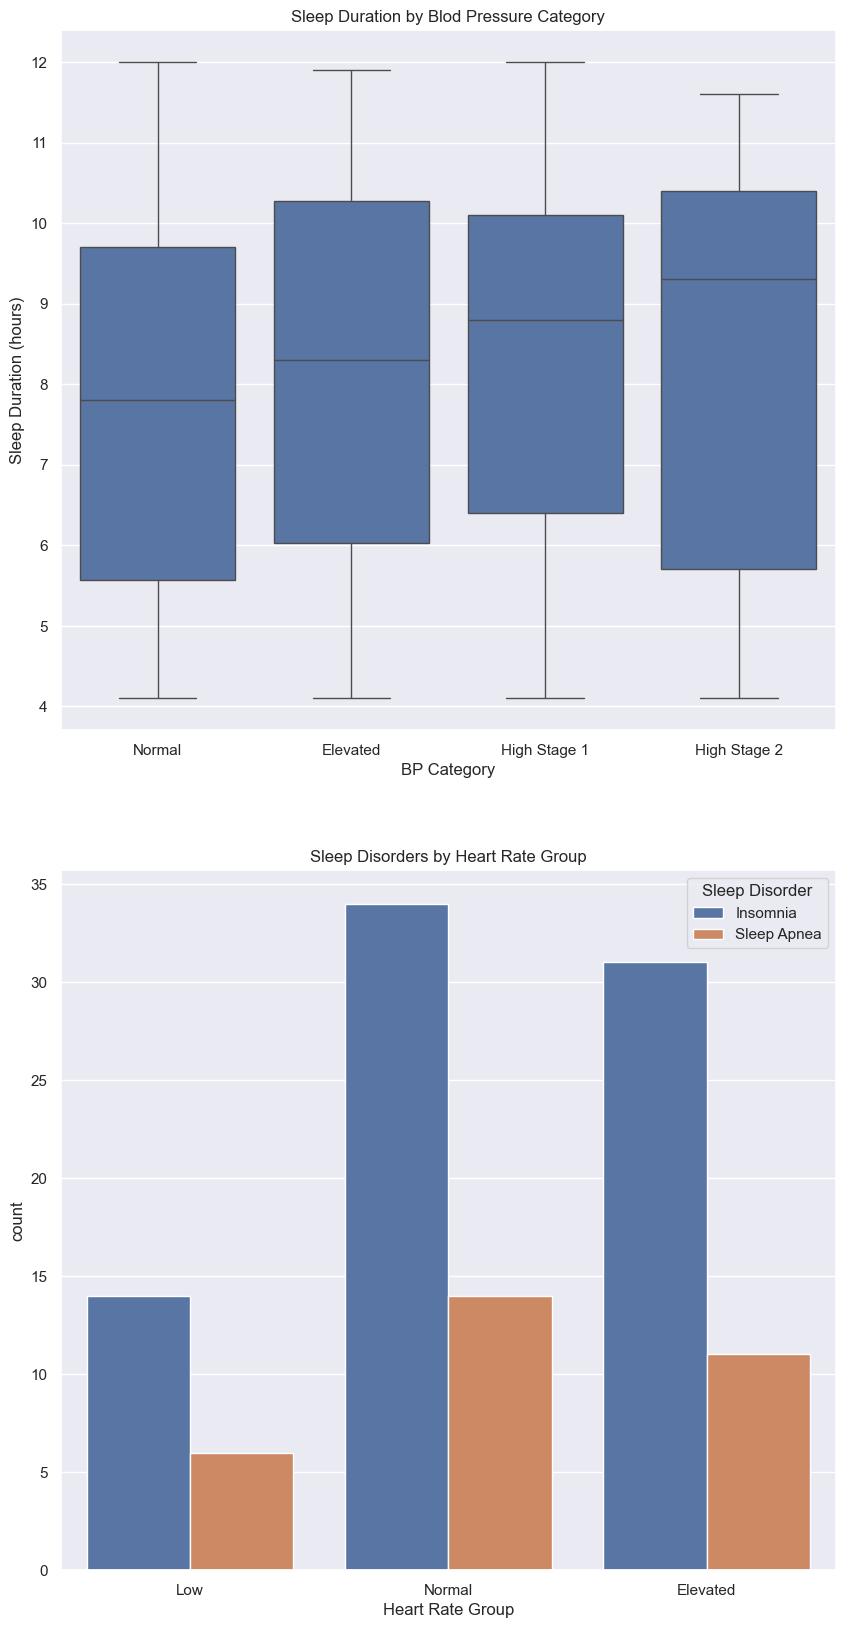

In [102]:
fig4, axes4 = plt.subplots(2, figsize = (10,20))
sns.set_theme(font_scale=1)

ax41 = sns.boxplot(data = sleep_transformed, x= 'BP Category', y = 'Sleep Duration (hours)', ax = axes4[0])
ax41.set_title('Sleep Duration by Blod Pressure Category')

ax42 =sns.countplot(data=sleep_transformed, x='Heart Rate Group', hue='Sleep Disorder')
ax42.set_title("Sleep Disorders by Heart Rate Group")

plt.show()

In [90]:
sleep_transformed['Heart Rate Group'] = pd.cut(
    sleep_transformed['Heart Rate (bpm)'], bins=[0, 60, 80, np.inf],
    labels=['Low', 'Normal', 'Elevated']
)

pd.crosstab(sleep_transformed['Heart Rate Group'], sleep_transformed['Sleep Disorder'], normalize='index') * 100


Sleep Disorder,Insomnia,Sleep Apnea
Heart Rate Group,,
Low,70.000000,30.000000
Normal,70.833333,29.166667
Elevated,73.809524,26.190476


In [126]:
from scipy.stats import kruskal

groups = [
    sleep_transformed[sleep_transformed['BP Category'] == 'Normal']['Sleep Duration (hours)'],
    sleep_transformed[sleep_transformed['BP Category'] == 'Elevated']['Sleep Duration (hours)'],
    sleep_transformed[sleep_transformed['BP Category'] == 'High Stage 1']['Sleep Duration (hours)'],
    sleep_transformed[sleep_transformed['BP Category'] == 'High Stage 2']['Sleep Duration (hours)']
]

stat, p_val = kruskal(*groups)
print("p-value:", p_val)


p-value: 0.22387124301708478


<h3>Insights</h3>

Upon the conducted data analysis, there is no significant difference between the different cardiovascular relationship on the sleep duration of the participant. In the correlation matrix, the values are not significant enough to be conclusive. In the box plots, it is shown that sleep duration is almost evenly distributed between the blood pressure categories. However, we can see that those with low heart rate are less prone to sleep disorders compared to those having normal and elevated heart rates. In the same graph, we can also see that most participants with sleep disorders have normal heart rates. Lastly, there is no significant difference between blood pressure categories in context of their sleep duration as shown in the results of the hypothesis testing with a p-value of 0.233 which fails to reject the null hypothesis.

<h3>❔<i>5. What lifestyle patterns distinguish individuals without sleep disorders from those with insomnia or apnea?</i></h3>

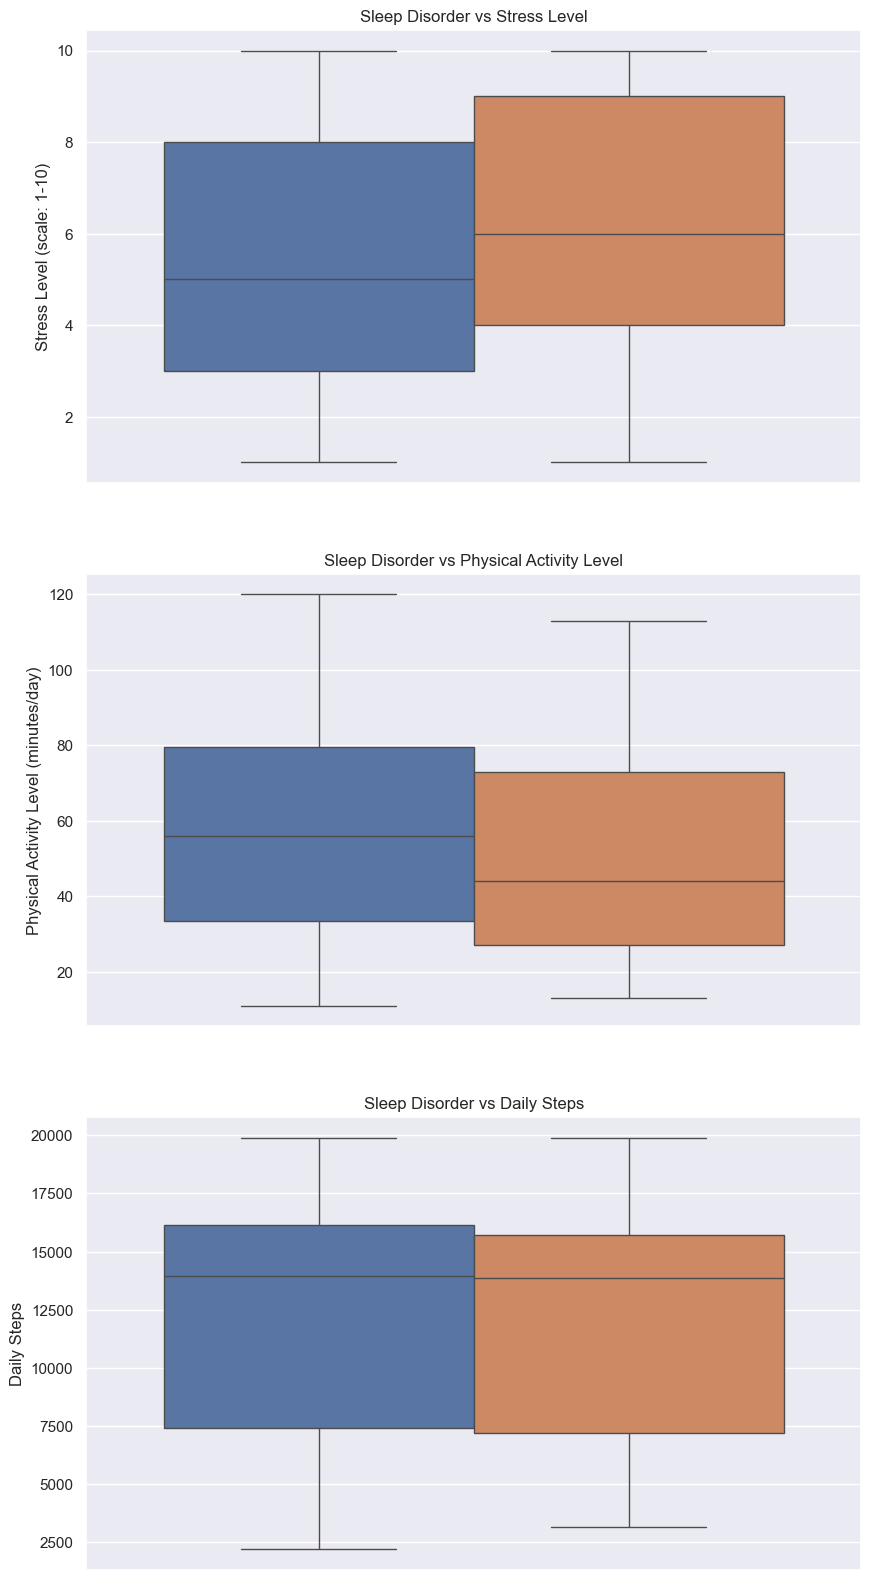

In [119]:
fig5, axes5 = plt.subplots(3, figsize = (10,20))
sns.set_theme(font_scale = 1)

ax51 = sns.boxplot(hue='Sleep Disorder', y='Stress Level (scale: 1-10)', data=sleep_transformed, ax = axes5[0], legend = False)
ax51.set_title('Sleep Disorder vs Stress Level')

ax52 = sns.boxplot(hue ='Sleep Disorder', y = 'Physical Activity Level (minutes/day)', data = sleep_transformed, ax = axes5[1], legend = False)
ax52.set_title('Sleep Disorder vs Physical Activity Level')

ax53 = sns.boxplot(hue ='Sleep Disorder', y = 'Daily Steps', data = sleep_transformed, ax = axes5[2], legend = False)
ax53.set_title('Sleep Disorder vs Daily Steps')

plt.show()


In [125]:
from scipy.stats import mannwhitneyu

insomnia_dsteps = sleep_transformed[sleep_transformed['Sleep Disorder'] == 'Insomnia']['Daily Steps']
apnea_dsteps = sleep_transformed[sleep_transformed['Sleep Disorder'] == 'Sleep Apnea']['Daily Steps']

stat, p_val = mannwhitneyu(insomnia_dsteps, apnea_dsteps, alternative='two-sided')
print("Daily Steps | p-value:", p_val)

insomnia_physical = sleep_transformed[sleep_transformed['Sleep Disorder'] == 'Insomnia']['Physical Activity Level (minutes/day)']
apnea_physical = sleep_transformed[sleep_transformed['Sleep Disorder'] == 'Sleep Apnea']['Physical Activity Level (minutes/day)']

stat, p_val = mannwhitneyu(insomnia_physical, apnea_physical, alternative='two-sided')
print("Physical Activity | p-value:", p_val)

insomnia_stress = sleep_transformed[sleep_transformed['Sleep Disorder'] == 'Insomnia']['Stress Level (scale: 1-10)']
apnea_stress = sleep_transformed[sleep_transformed['Sleep Disorder'] == 'Sleep Apnea']['Stress Level (scale: 1-10)']

stat, p_val = mannwhitneyu(insomnia_stress, apnea_stress, alternative='two-sided')
print("Daily Steps | p-value:", p_val)

Daily Steps | p-value: 0.8995439380208766
Physical Activity | p-value: 0.2303495458734277
Daily Steps | p-value: 0.2242379076198211


<h3>Insights</h3>

The box plot visualizations revealed that the median of participants with sleep apnea is more prone if they have a higher stress level than those who have insomnia. Inversely, those who have higher physical activity is more prone to insomnia. When it comes to daily steps, both disorders have almost the same median. When it comes to distribution, both disorders have the same spread of distribution. However, according to the Mann-Whitney test, there is no significant difference between disorders in the different factors.